# Data Analysis

In [1]:
# Import dependencies and setup
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
census_data = pd.read_csv('analysis_data/census_2019.csv',dtype={'FIPS Code':str})
census_data.set_index('FIPS Code', drop=True, inplace=True)
census_data 

,STNAME,CTYNAME,POPESTIMATE2019,TOT_MALE,TOT_FEMALE,0 - 17 years,18 - 49 years,50 - 64 years,65 + years,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other,Lat,Lng
FIPS Code,,,,,,,,,,,,,,,,,,
01001,Alabama,Autauga County,55869,27092,28777,14252,21652,11041,8924,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,0.0228,32.562500,-86.547800
01003,Alabama,Baldwin County,223234,108247,114987,52268,77402,46734,46830,0.0456,0.0065,0.0092,0.0917,0.0000,0.8307,0.0163,30.554945,-87.723960
01005,Alabama,Barbour County,24686,13064,11622,5595,9477,4753,4861,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581,0.0162,31.787050,-85.429850
01007,Alabama,Bibb County,22394,11929,10465,4992,9233,4436,3733,0.0257,0.0013,0.0012,0.2214,0.0000,0.7453,0.0051,33.059925,-87.145725
01009,Alabama,Blount County,57826,28472,29354,14522,21002,11488,10814,0.0926,0.0007,0.0037,0.0153,0.0004,0.8689,0.0184,33.957085,-86.576808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,Wyoming,Sweetwater County,42343,21808,20535,12049,16959,7846,5489,0.1588,0.0102,0.0074,0.0112,0.0003,0.7956,0.0165,41.670024,-109.198271
56039,Wyoming,Teton County,23464,12142,11322,4586,10694,4467,3717,0.1503,0.0033,0.0125,0.0124,0.0012,0.8134,0.0069,43.515844,-110.815633
56041,Wyoming,Uinta County,20226,10224,10002,6215,7229,3757,3025,0.0913,0.0065,0.0016,0.0011,0.0000,0.8752,0.0243,41.293529,-110.539357


In [3]:
patients_df = pd.read_csv('analysis_data/patients.csv', dtype={'FIPS Code':str})
patients_df.iloc[-1,0] = 'NA'
patients_df.set_index('FIPS Code', drop=True, inplace=True)
patients_df = patients_df.drop('2021-04', axis = 1)
patients_df 

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
FIPS Code,,,,,,,,,,,,,,,
01001,0.0,0.0,14.0,38.0,148.0,326.0,485.0,386.0,331.0,391.0,733.0,1383.0,1536.0,578.0,210.0
01003,0.0,0.0,62.0,131.0,72.0,428.0,2073.0,1370.0,1340.0,937.0,2060.0,3994.0,4489.0,1516.0,417.0
01005,0.0,0.0,0.0,40.0,91.0,146.0,228.0,144.0,147.0,155.0,117.0,258.0,418.0,159.0,68.0
01007,0.0,0.0,0.0,35.0,29.0,97.0,190.0,173.0,114.0,203.0,340.0,563.0,473.0,123.0,53.0
01009,0.0,0.0,13.0,32.0,15.0,144.0,555.0,538.0,297.0,510.0,1083.0,1552.0,993.0,328.0,267.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
icu_df = pd.read_csv('analysis_data/icu.csv',dtype={'FIPS Code':str})
icu_df.iloc[-1,0] = 'NA'
icu_df.set_index('FIPS Code', drop=True, inplace=True)
icu_df  = icu_df.drop('2021-04', axis = 1)

In [5]:
death_df = pd.read_csv('analysis_data/death.csv',dtype={'FIPS Code':str})
death_df.iloc[-1,0] = 'NA'
death_df.set_index('FIPS Code', drop=True, inplace=True)
death_df  = death_df.drop('2021-04', axis = 1)

In [6]:
total_abs = pd.read_csv('analysis_data/total_abs.csv',dtype={'FIPS Code':str})
total_abs.iloc[-1,0] = 'NA'
total_abs.set_index('FIPS Code', drop=True, inplace=True)
total_abs

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
01001,6622.0,148.0,0.0,0.0
01003,19052.0,280.0,0.0,119.0
01005,2001.0,62.0,0.0,0.0
01007,2408.0,62.0,0.0,0.0
01009,6376.0,87.0,0.0,11.0
...,...,...,...,...
56039,0.0,0.0,0.0,0.0
56041,0.0,0.0,0.0,0.0
56043,0.0,0.0,0.0,0.0


In [7]:
vaccination_df = pd.read_csv('analysis_data/vaccination_data.csv',dtype={'FIPS Code':str})
vaccination_df.set_index('FIPS Code', drop=True, inplace=True)
vaccination_df = vaccination_df[["Social Vulnerability Index (SVI)","SVI Category","Percent adults fully vaccinated against COVID-19"]]
vaccination_df

,Social Vulnerability Index (SVI),SVI Category,Percent adults fully vaccinated against COVID-19
FIPS Code,,,
1001,0.44,Moderate Vulnerability,0.114
1003,0.22,Low Vulnerability,0.176
1005,1.00,Very High Vulnerability,0.128
1007,0.60,High Vulnerability,0.115
1009,0.42,Moderate Vulnerability,0.095
...,...,...,...
56037,0.37,Low Vulnerability,0.228
56039,0.11,Very Low Vulnerability,0.305
56041,0.45,Moderate Vulnerability,0.206


In [8]:
vacc_wa = pd.read_csv('analysis_data/Worst_abs_vacc.csv',dtype={'FIPS':str})
vacc_wa.set_index('FIPS', drop=True, inplace=True)
vacc_wa = vacc_wa.dropna(axis =0)
vacc_wa

,County Name,Pct of Total Pop Fully Vaccinated,Pct of 18+ Pop Fully Vaccinated,Pct of 65+ Pop Fully Vaccinated
FIPS,,,,
6037,Los Angeles County (CA),32.9,41.5,63.7
4013,Maricopa County (AZ),27.6,35.6,63.7
17031,Cook County (IL),32.7,41.4,62.0
12086,Miami Dade (FL),32.0,39.9,70.1
6071,San Bernardino County (CA),24.5,32.8,61.6
6073,San Diego County (CA),24.0,30.2,51.7
6065,Riverside County (CA),26.9,35.4,64.6
36047,Kings County (NY),28.5,36.6,50.0
36081,Queens County(NY),35.4,44.0,60.1


In [9]:
vacc_wr = pd.read_csv('analysis_data/Worst_rel_vacc.csv',dtype={'FIPS':str},encoding='latin1')
vacc_wr.set_index('FIPS', drop=True, inplace=True)
vacc_wr = vacc_wr.dropna(axis =0)
vacc_wr

,County Name,Total pct vaccinated,Pct of 18+ Pop Fully Vaccinated,Pct of 65+ Pop Fully Vaccinated
FIPS,,,,
21003,Allen (KY),25.0,32.4,57.9
27105,Nobles County (MN),38.4,52.8,79.4
20175,Seward County (KS),19.8,29.1,57.5
16065,Madison County (ID),17.9,24.4,73.5
4027,Yuma (AZ),32.0,42.1,57.8
4023,Santa Cruz (AZ),48.2,65.2,89.2
36087,Rockland County ( NY),33.6,46.5,70.6
20057,Ford County (KS),22.8,32.4,68.0
6035,Lassen County (CA),20.3,24.5,61.6


In [10]:
tot_rel = pd.DataFrame((total_abs.iloc[0:-1,:]["Patients"]/census_data["POPESTIMATE2019"]), columns = ["Patients"])
tot_rel["Hospitalized"] = (total_abs.iloc[0:-1,:]["Hospitalized"]/census_data["POPESTIMATE2019"])
tot_rel["ICU"]= (total_abs.iloc[0:-1,:]["ICU"]/census_data["POPESTIMATE2019"])
tot_rel["Death"]= (total_abs.iloc[0:-1,:]["Death"]/census_data["POPESTIMATE2019"])
tot_rel

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
01001,0.118527,0.002649,0.0,0.000000
01003,0.085345,0.001254,0.0,0.000533
01005,0.081058,0.002512,0.0,0.000000
01007,0.107529,0.002769,0.0,0.000000
01009,0.110262,0.001505,0.0,0.000190
...,...,...,...,...
56037,0.000000,0.000000,0.0,0.000000
56039,0.000000,0.000000,0.0,0.000000
56041,0.000000,0.000000,0.0,0.000000


In [11]:
#See most affected FIPS and less affected FIPS ( by patient number)
worst_fip_patient= total_abs.sort_values(by='Patients', ascending=False)
worst_fip_patient.head()

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
NA,1788654.0,59949.0,6205.0,19529.0
06037,1124813.0,81869.0,15949.0,21291.0
04013,531243.0,46700.0,1.0,8435.0
17031,530918.0,31810.0,5525.0,11573.0
12086,398878.0,9375.0,1.0,6136.0


In [12]:
worst_ten_pat = worst_fip_patient.iloc[1:11, :]
worst_ten_pat

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
06037,1124813.0,81869.0,15949.0,21291.0
04013,531243.0,46700.0,1.0,8435.0
17031,530918.0,31810.0,5525.0,11573.0
12086,398878.0,9375.0,1.0,6136.0
06071,289868.0,9806.0,1386.0,3724.0
06065,285987.0,7458.0,824.0,3483.0
06073,274033.0,15143.0,1657.0,2833.0
36047,268440.0,33398.0,2396.0,10704.0
36081,266518.0,33505.0,2539.0,9928.0


In [13]:
best_fip_patient= total_abs.sort_values(by='Patients', ascending=True)
best_fip_patient.head(1650)

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
29177,0.0,0.0,0.0,0.0
29143,0.0,0.0,0.0,0.0
29141,0.0,0.0,0.0,0.0
29139,0.0,0.0,0.0,0.0
29137,0.0,0.0,0.0,0.0
...,...,...,...,...
20071,0.0,0.0,0.0,0.0
20181,0.0,0.0,0.0,0.0
20193,0.0,0.0,0.0,0.0


In [14]:
#See most affected FIPS and less affected FIPS ( by death number)
worst_fip_death = total_abs.sort_values(by='Death', ascending=False)

In [15]:
worst_ten_death = worst_fip_death.iloc[0:11, :]
worst_ten_death

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
06037,1124813.0,81869.0,15949.0,21291.0
NA,1788654.0,59949.0,6205.0,19529.0
17031,530918.0,31810.0,5525.0,11573.0
36047,268440.0,33398.0,2396.0,10704.0
36081,266518.0,33505.0,2539.0,9928.0
04013,531243.0,46700.0,1.0,8435.0
36005,176885.0,24002.0,3006.0,6592.0
12086,398878.0,9375.0,1.0,6136.0
06059,251902.0,10366.0,1875.0,4121.0


## Vaccinated vs. Time 

## Time Line for worst FIPS 

In [16]:
#Division to get relative values in the dataframe for cases and months 
rel_time = (patients_df.div(census_data.POPESTIMATE2019, axis=0))*100
rel_time

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
FIPS Code,,,,,,,,,,,,,,,
01001,0.0,0.0,0.025059,0.068016,0.264905,0.583508,0.868102,0.690902,0.592457,0.699851,1.311998,2.475434,2.749289,1.034563,0.375879
01003,0.0,0.0,0.027774,0.058683,0.032253,0.191727,0.928622,0.613706,0.600267,0.419739,0.922798,1.789154,2.010894,0.679108,0.186800
01005,0.0,0.0,0.000000,0.162035,0.368630,0.591428,0.923600,0.583327,0.595479,0.627886,0.473953,1.045127,1.693267,0.644090,0.275460
01007,0.0,0.0,0.000000,0.156292,0.129499,0.433152,0.848442,0.772528,0.509065,0.906493,1.518264,2.514066,2.112173,0.549254,0.236671
01009,0.0,0.0,0.022481,0.055338,0.025940,0.249023,0.959776,0.930377,0.513610,0.881956,1.872860,2.683914,1.717221,0.567219,0.461730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56039,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
56041,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
56043,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
worst_rel_list = rel_time.sum(axis=1).sort_values(ascending= False)
worst_rel_list.head(11)

FIPS Code
21003    18.540934
27105    18.054464
20175    17.444465
16065    17.255118
04027    17.201701
04023    16.987827
36087    16.890994
20057    16.850590
06035    16.576718
19149    15.677007
40153    15.328287
dtype: float64

In [18]:
w_abs_time=rel_time.loc[["06037","04013","17031","12086","06071","06073","06065","36047", "36081", "06059", "32003"]]
w_abs_time

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
FIPS Code,,,,,,,,,,,,,,,
06037,0.002709,0.001086,0.064697,0.219502,0.299399,0.520126,0.804165,0.399926,0.264496,0.365780,1.132322,3.831118,2.664370,0.430078,0.144336
04013,0.001471,0.000580,0.035671,0.081330,0.175056,1.056759,1.365604,0.300440,0.192424,0.444686,1.366518,2.868186,2.849481,0.632561,0.318231
17031,0.000233,0.001864,0.253348,0.816759,0.581993,0.220844,0.341926,0.417981,0.428544,1.525407,2.239782,1.406635,0.813225,0.316393,0.611254
12086,0.000000,0.001509,0.176927,0.241669,0.209316,0.347855,0.853166,1.822013,0.949046,1.617040,0.558386,0.818826,1.810640,1.561315,3.107945
06071,0.001789,0.000872,0.033210,0.088162,0.172837,0.614563,0.936569,0.428194,0.290631,0.506081,1.853322,4.986916,2.767461,0.410030,0.140958
06073,0.000000,0.000479,0.046850,0.090315,0.120330,0.279451,0.438752,0.237754,0.255787,0.304404,0.926901,2.576528,2.165005,0.457295,0.205971
06065,0.001538,0.000607,0.046791,0.147943,0.198377,0.609541,0.832852,0.353161,0.268443,0.382871,1.239605,3.973130,2.866937,0.445772,0.145636
36047,0.001289,0.008125,0.759013,1.197389,0.347904,0.129302,0.112739,0.099027,0.189265,0.292316,0.665689,1.430054,1.969840,1.309034,1.436226
36081,0.000488,0.009362,0.939944,1.564828,0.360937,0.149122,0.118508,0.090822,0.129068,0.246777,0.757457,1.663858,2.242333,1.382430,1.600988


In [19]:
case_number = ["2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03"]
dates = w_abs_time.columns
index = w_abs_time.index

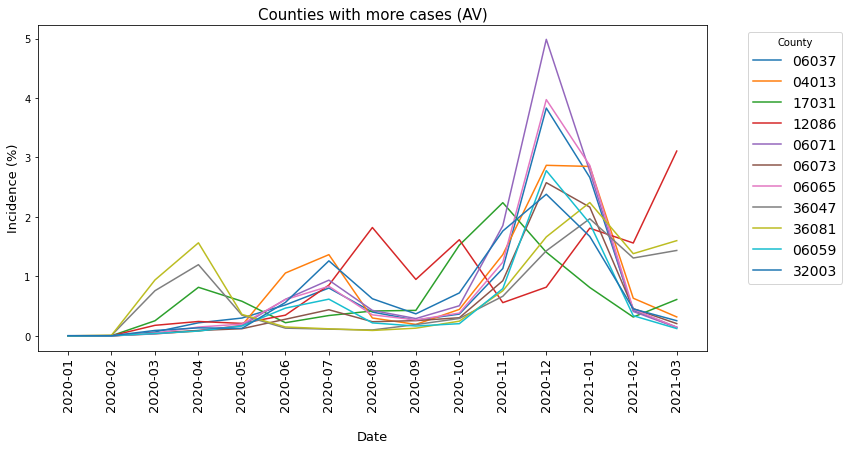

In [20]:
#for index,label in w_abs_time.iterrows():
plt.figure(figsize=(12,6))
plt.plot(w_abs_time.T.values)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], ["2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03"],rotation=90, fontsize =13)
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left',labels = index, fontsize=14)

#Add labels
plt.title("Counties with more cases (AV)", fontsize = 15)
plt.xlabel("\nDate", fontsize = 13)
plt.ylabel("Incidence (%)", fontsize = 13)
plt.savefig("figures/abs_val_countiesr.png",dpi=300, bbox_inches = "tight")

In [21]:
patients_time=patients_df.loc[["06037","04013","17031","12086","06071","06073","06065","36047", "36081", "06059", "32003"]]
patients_time

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
FIPS Code,,,,,,,,,,,,,,,
06037,272.0,109.0,6495.0,22036.0,30057.0,52216.0,80731.0,40149.0,26553.0,36721.0,113675.0,384610.0,267479.0,43176.0,14490.0
04013,66.0,26.0,1600.0,3648.0,7852.0,47400.0,61253.0,13476.0,8631.0,19946.0,61294.0,128650.0,127811.0,28373.0,14274.0
17031,12.0,96.0,13048.0,42065.0,29974.0,11374.0,17610.0,21527.0,22071.0,78562.0,115354.0,72445.0,41883.0,16295.0,31481.0
12086,0.0,41.0,4807.0,6566.0,5687.0,9451.0,23180.0,49503.0,25785.0,43934.0,15171.0,22247.0,49194.0,42420.0,84441.0
06071,39.0,19.0,724.0,1922.0,3768.0,13398.0,20418.0,9335.0,6336.0,11033.0,40404.0,108719.0,60333.0,8939.0,3073.0
06073,0.0,16.0,1564.0,3015.0,4017.0,9329.0,14647.0,7937.0,8539.0,10162.0,30943.0,86013.0,72275.0,15266.0,6876.0
06065,38.0,15.0,1156.0,3655.0,4901.0,15059.0,20576.0,8725.0,6632.0,9459.0,30625.0,98158.0,70829.0,11013.0,3598.0
36047,33.0,208.0,19430.0,30652.0,8906.0,3310.0,2886.0,2535.0,4845.0,7483.0,17041.0,36608.0,50426.0,33510.0,36766.0
36081,11.0,211.0,21185.0,35269.0,8135.0,3361.0,2671.0,2047.0,2909.0,5562.0,17072.0,37501.0,50539.0,31158.0,36084.0


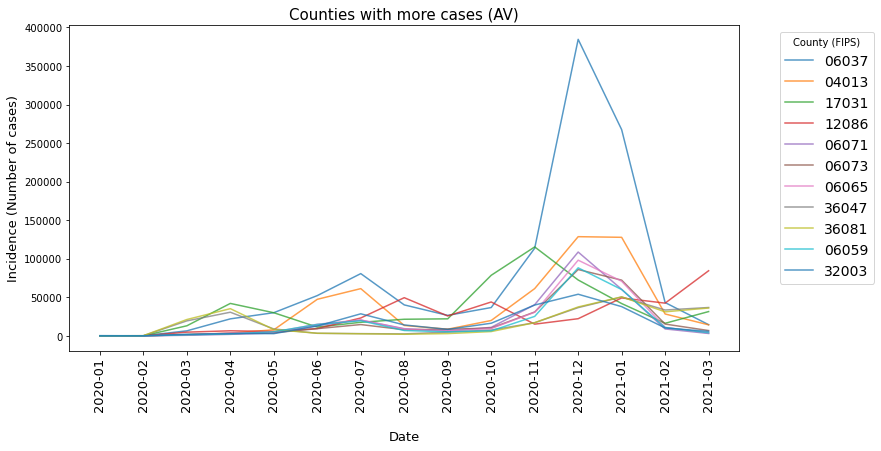

In [22]:
#Plot figure for most affected counties ( found in absolute, shown in absolute)
plt.figure(figsize=(12,6))
plt.plot(patients_time.T.values, alpha = 0.75)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], ["2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03"],rotation=90, fontsize =13)
plt.legend(title='County (FIPS)', bbox_to_anchor=(1.05, 1), loc='upper left',labels = index, fontsize =14)
#Add labels
plt.title("Counties with more cases (AV)", fontsize = 15)
plt.xlabel("\nDate", fontsize = 13)
plt.ylabel("Incidence (Number of cases)", fontsize = 13)

plt.savefig("figures/abs_val_counties.png",dpi=300, bbox_inches = "tight")

In [23]:
#Create data frame with worst FIPS by relative value 
w_rel_time= rel_time.loc[["21003","27105","20175","16065","04027","04023","36087","20057", "06035", "19149", "40153"]]
#Create index value for plot 
index_2 =w_rel_time.index
w_rel_time

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
FIPS Code,,,,,,,,,,,,,,,
21003,0.000000,0.000000,0.000000,0.079756,0.455079,0.370631,0.422238,0.441004,0.647431,1.158808,3.645320,4.034717,5.062163,1.060286,1.163500
27105,0.000000,0.000000,0.000000,5.233714,2.066670,0.397614,0.383744,0.633409,0.559434,2.408803,3.143927,1.659809,0.910814,0.383744,0.272782
20175,0.000000,0.000000,0.000000,2.804741,1.250700,0.541348,0.709352,0.690685,1.526041,2.090722,4.078775,2.426731,0.877357,0.233340,0.214672
16065,0.000000,0.000000,0.000000,0.027564,0.030070,0.050117,0.228030,0.310722,2.425640,4.377678,3.879019,2.122435,1.443356,1.037412,1.323076
04027,0.000000,0.000000,0.010291,0.066421,0.734376,2.569848,1.916393,0.453255,0.272234,0.711924,2.543186,4.493257,2.796709,0.463545,0.170263
04023,0.000000,0.000000,0.000000,0.077423,1.012947,3.400146,1.225859,0.268829,0.195707,0.546260,2.554949,4.473311,2.499032,0.404318,0.329046
36087,0.008288,0.006753,2.149551,3.058114,2.901264,1.271682,0.669452,0.440469,0.603151,0.798983,1.116674,1.126496,1.167320,0.626479,0.946318
20057,0.000000,0.000000,0.035694,2.641364,2.706803,0.574080,0.386686,0.817990,1.793629,1.951278,3.164877,1.374223,0.803117,0.309349,0.291502
06035,0.000000,0.000000,0.000000,0.000000,0.000000,0.762110,1.272365,0.278023,0.081771,0.137376,5.079645,7.110849,1.246198,0.569130,0.039250


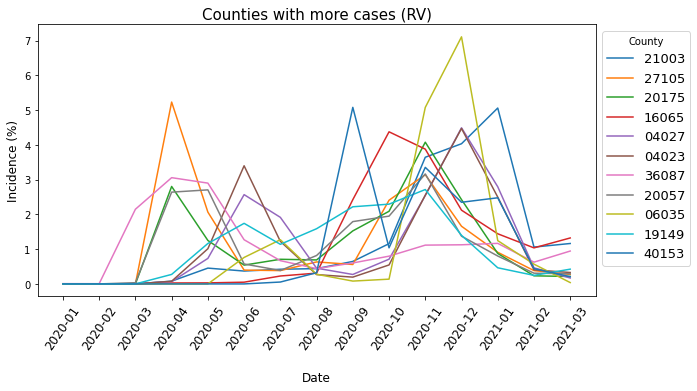

In [24]:
plt.figure(figsize=(10,5))
plt.plot(w_rel_time.T.values)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], ["2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03"],rotation=55, fontsize = 12)
plt.legend(title='County', bbox_to_anchor=(1, 1), loc='upper left',labels = index_2, fontsize =13)

#Add labels
plt.title("Counties with more cases (RV)", fontsize = 15)
plt.xlabel("\nDate", fontsize = 12)
plt.ylabel("Incidence (%)", fontsize = 12)

#Create png image 
plt.savefig("figures/rel_val_counties.png",dpi=300, bbox_inches = "tight")

## Sex, ethnic group and age of best against worst FIPS

## Scatter (patients and vaccinated) 

In [25]:
vaccination_df = pd.read_csv('analysis_data/vaccination_data.csv',dtype={'FIPS Code':str})
fips_census = []
for index, row in vaccination_df.iterrows():
        fips_census.append(f"{row['FIPS Code']:0>5}")

vaccination_df.drop('FIPS Code', axis=1, inplace=True)
vaccination_df['FIPS Code'] = fips_census
vaccination_df.set_index('FIPS Code', drop=True, inplace=True)

In [26]:
pat = tot_rel['Patients']
vacc = vaccination_df['Percent adults fully vaccinated against COVID-19']
svi = vaccination_df['Social Vulnerability Index (SVI)']

scatter_df = pd.DataFrame(data={pat.name:pat, vacc.name:vacc.values, svi.name:svi})
scatter_df.dropna(inplace=True)

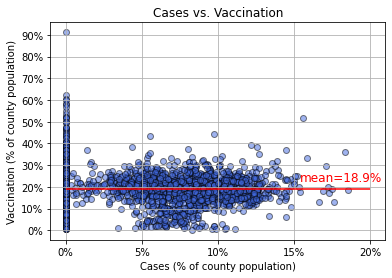

Cases vs. Vaccination (r-value): -0.03
Cases vs. Vaccination (r-squared): 0.0009


In [27]:
x_values = scatter_df['Patients']
y_values = scatter_df['Percent adults fully vaccinated against COVID-19']
c_values = scatter_df['Social Vulnerability Index (SVI)']

## SCATTER PLOT
## Set Scatter Plot parameters
plt.scatter(x_values, y_values, color='royalblue', alpha=0.5, edgecolors= "black")


# Set Title, X Label, and Y Label
plt.title(f"Cases vs. Vaccination")
plt.xlabel("Cases (% of county population)")
plt.ylabel("Vaccination (% of county population)")

x_lim = math.ceil(x_values.max()*100/5)*5
x_ticks = [i/100 for i in range(0, x_lim+1, 5)]
x_ticks_labels = [f'{i/100:.0%}' for i in range(0, x_lim+1, 5)]
plt.xticks(x_ticks, x_ticks_labels, rotation=0)

y_lim = math.ceil(y_values.max()*100/10)*10
y_ticks = [i/100 for i in range(0, y_lim+1, 10)]
y_ticks_labels = [f'{i/100:.0%}' for i in range(0, y_lim+1, 10)]
plt.yticks(y_ticks, y_ticks_labels, rotation=0)

# Plot & Annotate horizontal line for mean
plt.hlines(y_values.mean(), 0, x_lim/100, color='red')
plt.annotate(f"mean={y_values.mean():.1%}",((x_lim-4.6)/100, y_values.mean()+.04, ), fontsize=12, color='red', alpha=1)

## Show grid
plt.grid()

# Save plot
plt.savefig("figures/patients_vaccinated_scatter.png")

## Show plot
plt.show()

## Display Pearson Correlation & Regression R^2
## Print r-value
# print(f"Pearson correlation coefficient (r-value): {round(st.pearsonr(x_values, y_values)[0],2)}")
## Print r-squared
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# print(f"Linear reggression coefficient of detemination (r-squared): {rvalue**2:.4f}")

print(f"Cases vs. Vaccination (r-value): {round(st.pearsonr(x_values, y_values)[0],2)}")
print(f"Cases vs. Vaccination (r-squared): {rvalue**2:.4f}")

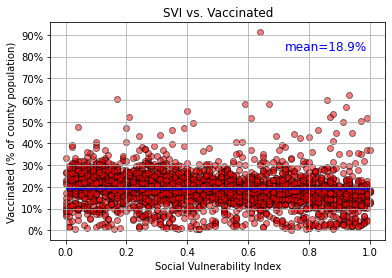

SVI vs. Vaccination (r-value): -0.18
SVI vs. Vaccination (r-squared): 0.0321


In [28]:
x_values = scatter_df['Social Vulnerability Index (SVI)']
y_values = scatter_df['Percent adults fully vaccinated against COVID-19']

## SCATTER PLOT
## Set Scatter Plot parameters
plt.scatter(x_values, y_values, color='red', alpha=0.5, edgecolors= 'black')
# plt.scatter(x_values, c_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= 'black')

# Set Title, X Label, and Y Label
plt.title(f"SVI vs. Vaccinated")
plt.xlabel("Social Vulnerability Index")
plt.ylabel("Vaccinated (% of county population)")

x_max = math.ceil(x_values.max()*100/20)*20
x_ticks = [i/100 for i in range(0, x_max+1, 20)]
x_ticks_labels = [f'{i/100:.1f}' for i in range(0, x_max+1, 20)]
plt.xticks(x_ticks, x_ticks_labels, rotation=0)

y_max = math.ceil(y_values.max()*100/10)*10
y_ticks = [i/100 for i in range(0, y_max+1, 10)]
y_ticks_labels = [f'{i/100:.0%}' for i in range(0, y_max+1, 10)]
plt.yticks(y_ticks, y_ticks_labels, rotation=0)

# Plot & Annotate horizontal line for mean
plt.hlines(y_values.mean(), 0, x_max/100, color='blue')
plt.annotate(f"mean={y_values.mean():.1%}",(.72, .83), fontsize=12, color='blue', alpha=1)

## Show grid
plt.grid()
# Save plot
plt.savefig("figures/svi_vaccinated_scatter.png")

## Show plot
plt.show()

## Display Pearson Correlation & Regression R^2
## Print r-value
# print(f"Pearson correlation coefficient (r-value): {round(st.pearsonr(x_values, y_values)[0],2)}")
## Print r-squared
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# print(f"Linear reggression coefficient of detemination (r-squared): {rvalue**2:.4f}")

print(f"SVI vs. Vaccination (r-value): {round(st.pearsonr(x_values, y_values)[0],2)}")
print(f"SVI vs. Vaccination (r-squared): {rvalue**2:.4f}")

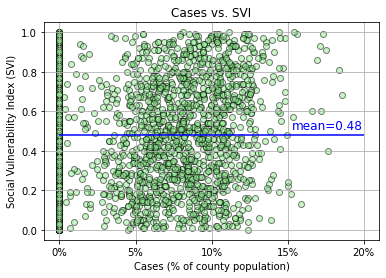

Cases vs. SVI (r-value): 0.09
Cases vs. SVI (r-squared): 0.0086


In [29]:
x_values = scatter_df['Patients']
y_values = scatter_df['Social Vulnerability Index (SVI)']
c_values = scatter_df['Percent adults fully vaccinated against COVID-19']

## SCATTER PLOT
## Set Scatter Plot parameters
plt.scatter(x_values, y_values, color='lightgreen', alpha=0.5, edgecolors= 'black')
# plt.scatter(x_values, y_values, c=c_values, cmap='plasma', alpha=0.75, edgecolors= 'black')

# Set Title, X Label, and Y Label
plt.title(f"Cases vs. SVI")
plt.xlabel("Cases (% of county population)")
plt.ylabel("Social Vulnerability Index (SVI)")

x_max = math.ceil(x_values.max()*100/5)*5
x_ticks = [i/100 for i in range(0, x_max+1, 5)]
x_ticks_labels = [f'{i/100:.0%}' for i in range(0, x_max+1, 5)]
plt.xticks(x_ticks, x_ticks_labels, rotation=0)

y_max = math.ceil(y_values.max()*100/20)*20
y_ticks = [i/100 for i in range(0, y_max+1, 20)]
y_ticks_labels = [f'{i/100:.1f}' for i in range(0, y_max+1, 20)]
plt.yticks(y_ticks, y_ticks_labels, rotation=0)

# Plot & Annotate horizontal line for mean
plt.hlines(y_values.mean(), 0, x_lim/100, color='blue')
plt.annotate(f"mean={y_values.mean():.2f}",((x_lim-4.7)/100, y_values.mean()+.03, ), fontsize=12, color='blue', alpha=1)

## Show grid
plt.grid()
# Save plot
plt.savefig("figures/patients_svi_scatter.png")

## Show plot
plt.show()

## Display Pearson Correlation & Regression R^2
## Print r-value
# print(f"Pearson correlation coefficient (r-value): {round(st.pearsonr(x_values, y_values)[0],2)}")
## Print r-squared
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# print(f"Linear reggression coefficient of detemination (r-squared): {rvalue**2:.4f}")

print(f"Cases vs. SVI (r-value): {round(st.pearsonr(x_values, y_values)[0],2)}")
print(f"Cases vs. SVI (r-squared): {rvalue**2:.4f}")

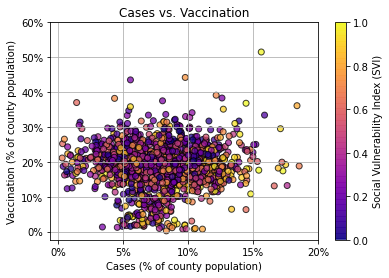

Cases vs. Vaccination (r-value): 0.02
Cases vs. Vaccination (r-squared): 0.0004


In [30]:
x_values = scatter_df['Patients'].loc[scatter_df['Patients'] != 0]
y_values = scatter_df['Percent adults fully vaccinated against COVID-19'].loc[scatter_df['Patients'] != 0]
c_values = scatter_df['Social Vulnerability Index (SVI)'].loc[scatter_df['Patients'] != 0]

## SCATTER PLOT
## Set Scatter Plot parameters
contour = plt.scatter(x_values, y_values, c=c_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"Cases vs. Vaccination")
plt.xlabel("Cases (% of county population)")
plt.ylabel("Vaccination (% of county population)")

x_lim = math.ceil(x_values.max()*100/5)*5
x_ticks = [i/100 for i in range(0, x_lim+1, 5)]
x_ticks_labels = [f'{i/100:.0%}' for i in range(0, x_lim+1, 5)]
plt.xticks(x_ticks, x_ticks_labels, rotation=0)

y_lim = math.ceil(y_values.max()*100/10)*10
y_ticks = [i/100 for i in range(0, y_lim+1, 10)]
y_ticks_labels = [f'{i/100:.0%}' for i in range(0, y_lim+1, 10)]
plt.yticks(y_ticks, y_ticks_labels, rotation=0)

# plt.hlines(y_values.mean(), 0, x_lim/100, color='red')

## Show grid
plt.grid()

cbar = plt.colorbar(contour)
cbar.set_label('Social Vulnerability Index (SVI)')

# Save plot
plt.savefig("figures/3_variable_scatter.png")

## Show plot
plt.show()

## Display Pearson Correlation & Regression R^2
## Print r-value
# print(f"Pearson correlation coefficient (r-value): {round(st.pearsonr(x_values, y_values)[0],2)}")
## Print r-squared
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# print(f"Linear reggression coefficient of detemination (r-squared): {rvalue**2:.4f}")

print(f"Cases vs. Vaccination (r-value): {round(st.pearsonr(x_values, y_values)[0],2)}")
print(f"Cases vs. Vaccination (r-squared): {rvalue**2:.4f}")

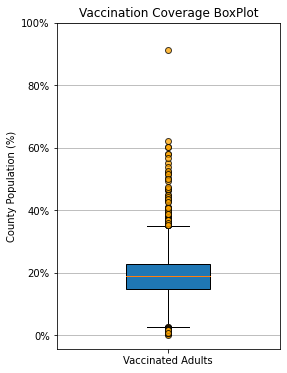

In [31]:
x_values = scatter_df['Patients']
y_values = scatter_df['Percent adults fully vaccinated against COVID-19']

## BOX PLOT
## Set Box Plot parameters
plt.figure(figsize=(4,6))
outlier_style = dict(markerfacecolor='orange', marker='o', alpha=0.75)
plt.boxplot(y_values, patch_artist=True, flierprops=outlier_style)

# Give the chart a title and y label
plt.title("Vaccination Coverage BoxPlot")
plt.ylabel("County Population (%)")
# Set x_axis properties
plt.xticks([1],["Vaccinated Adults"])
# Set y_axis properties
y_ticks = [i/100 for i in range(0, 100+1, 20)]
y_ticks_labels = [f'{i/100:.0%}' for i in range(0, 100+1, 20)]
plt.yticks(y_ticks, y_ticks_labels, rotation=0)

# Set the limits of the x axis
plt.xlim(0.8, 1.2)

## Show grid
plt.grid(axis='y')
## Save plot
plt.savefig("figures/vaccination_boxplot.png")
## Show plot
plt.show()

## Bars for ethnic groups 

## Heatmap 

In [32]:
# Dependencies
import gmaps

# Import API Key
from api_keys import api_key

# Cofigure gmaps
gmaps.configure(api_key)

In [33]:
data = census_data[["Lat", "Lng"]]
data["SVI"] = vaccination_df[["Social Vulnerability Index (SVI)"]]
data["SVI"] = data["SVI"].fillna(0.0)
data["Vaccinated%"] = vaccination_df[["Percent adults fully vaccinated against COVID-19"]]
data["Vaccinated%"] = data["Vaccinated%"].fillna(0.0)
data.dropna(subset = ["Lat"], inplace=True)
data

<ipython-input-33-b544245a57d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SVI"] = vaccination_df[["Social Vulnerability Index (SVI)"]]
<ipython-input-33-b544245a57d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SVI"] = data["SVI"].fillna(0.0)
<ipython-input-33-b544245a57d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,Lat,Lng,SVI,Vaccinated%
FIPS Code,,,,
01001,32.562500,-86.547800,0.44,0.114
01003,30.554945,-87.723960,0.22,0.176
01005,31.787050,-85.429850,1.00,0.128
01007,33.059925,-87.145725,0.60,0.115
01009,33.957085,-86.576808,0.42,0.095
...,...,...,...,...
56037,41.670024,-109.198271,0.37,0.228
56039,43.515844,-110.815633,0.11,0.305
56041,41.293529,-110.539357,0.45,0.206


In [34]:
locations = data[["Lat", "Lng"]]

weights_SVI = data["SVI"]
heatmap_layer_SVI = gmaps.heatmap_layer(locations, weights=weights_SVI, point_radius=10)

weights_vaccinated = data["Vaccinated%"]
heatmap_layer_vaccinated = gmaps.heatmap_layer(locations, weights=weights_vaccinated, point_radius=10)

In [35]:
fig = gmaps.figure()

fig.add_layer(heatmap_layer_SVI)

fig

Figure(layout=FigureLayout(height='420px'))

In [36]:
fig = gmaps.figure()

fig.add_layer(heatmap_layer_vaccinated)

fig

Figure(layout=FigureLayout(height='420px'))

In [37]:
fig = gmaps.figure()

fig.add_layer(heatmap_layer_SVI)
fig.add_layer(heatmap_layer_vaccinated)

fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
import seaborn as sns

In [39]:
heatmap_data = pd.merge(total_abs, census_data, on='FIPS Code')
heatmap_data = pd.merge(heatmap_data, vaccination_df, on='FIPS Code')
heatmap_data

,Patients,Hospitalized,ICU,Death,STNAME,CTYNAME,POPESTIMATE2019,TOT_MALE,TOT_FEMALE,0 - 17 years,...,Social Vulnerability Index (SVI),SVI Category,Percent adults fully vaccinated against COVID-19,Percent Hispanic_y,Percent non-Hispanic American Indian/Alaska Native_y,Percent non-Hispanic Asian_y,Percent non-Hispanic Black_y,Percent non-Hispanic Native Hawaiian/Pacific Islander_y,Percent non-Hispanic White_y,Percent non-Hispanic Other_y
FIPS Code,,,,,,,,,,,,,,,,,,,,,
01001,6622.0,148.0,0.0,0.0,Alabama,Autauga County,55869,27092,28777,14252,...,0.44,Moderate Vulnerability,0.114,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,0.0228
01003,19052.0,280.0,0.0,119.0,Alabama,Baldwin County,223234,108247,114987,52268,...,0.22,Low Vulnerability,0.176,0.0456,0.0065,0.0092,0.0917,0.0000,0.8307,0.0163
01005,2001.0,62.0,0.0,0.0,Alabama,Barbour County,24686,13064,11622,5595,...,1.00,Very High Vulnerability,0.128,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581,0.0162
01007,2408.0,62.0,0.0,0.0,Alabama,Bibb County,22394,11929,10465,4992,...,0.60,High Vulnerability,0.115,0.0257,0.0013,0.0012,0.2214,0.0000,0.7453,0.0051
01009,6376.0,87.0,0.0,11.0,Alabama,Blount County,57826,28472,29354,14522,...,0.42,Moderate Vulnerability,0.095,0.0926,0.0007,0.0037,0.0153,0.0004,0.8689,0.0184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,0.0,0.0,0.0,0.0,Wyoming,Sweetwater County,42343,21808,20535,12049,...,0.37,Low Vulnerability,0.228,0.1588,0.0102,0.0074,0.0112,0.0003,0.7956,0.0165
56039,0.0,0.0,0.0,0.0,Wyoming,Teton County,23464,12142,11322,4586,...,0.11,Very Low Vulnerability,0.305,0.1503,0.0033,0.0125,0.0124,0.0012,0.8134,0.0069
56041,0.0,0.0,0.0,0.0,Wyoming,Uinta County,20226,10224,10002,6215,...,0.45,Moderate Vulnerability,0.206,0.0913,0.0065,0.0016,0.0011,0.0000,0.8752,0.0243


In [40]:
heatmap_data.sort_values(by=['Death'], inplace=True, ascending=False)
heatmap_data = heatmap_data[["STNAME", "Patients", "SVI Category"]]
heatmap_data

,STNAME,Patients,SVI Category
FIPS Code,,,
06037,California,1124813.0,High Vulnerability
17031,Illinois,530918.0,High Vulnerability
36047,New York,268440.0,Very High Vulnerability
36081,New York,266518.0,High Vulnerability
04013,Arizona,531243.0,High Vulnerability
...,...,...,...
24023,Maryland,0.0,Very Low Vulnerability
24025,Maryland,8911.0,Very Low Vulnerability
24027,Maryland,5759.0,Very Low Vulnerability


In [41]:
heatmap_data = heatmap_data.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=['Patients'])
heatmap_data

<ipython-input-41-3a7b8309e76a>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  heatmap_data = heatmap_data.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=['Patients'])


,STNAME,Patients,SVI Category
FIPS Code,,,
06037,California,1124813.0,High Vulnerability
17031,Illinois,530918.0,High Vulnerability
36047,New York,268440.0,Very High Vulnerability
36081,New York,266518.0,High Vulnerability
04013,Arizona,531243.0,High Vulnerability
...,...,...,...
24015,Maryland,3832.0,Low Vulnerability
24017,Maryland,1131.0,Very Low Vulnerability
24021,Maryland,12430.0,Very Low Vulnerability


In [42]:
heatmap_data = heatmap_data.groupby(['STNAME','SVI Category']).agg({'Patients': 'sum'})
heatmap_data.index

MultiIndex([(      'Alabama',      'High Vulnerability'),
            (      'Alabama',       'Low Vulnerability'),
            (      'Alabama',  'Moderate Vulnerability'),
            (      'Alabama', 'Very High Vulnerability'),
            (      'Alabama',  'Very Low Vulnerability'),
            (       'Alaska',       'Low Vulnerability'),
            (       'Alaska',  'Moderate Vulnerability'),
            (      'Arizona',      'High Vulnerability'),
            (      'Arizona',  'Moderate Vulnerability'),
            (      'Arizona', 'Very High Vulnerability'),
            ...
            (   'Washington',      'High Vulnerability'),
            (   'Washington',       'Low Vulnerability'),
            (   'Washington',  'Moderate Vulnerability'),
            (   'Washington', 'Very High Vulnerability'),
            (   'Washington',  'Very Low Vulnerability'),
            ('West Virginia',  'Moderate Vulnerability'),
            (    'Wisconsin',       'Low Vulnerability')

In [43]:
from sklearn.preprocessing import LabelEncoder

heatmap_data.index = heatmap_data.index.set_names(['State', 'SVI Category'])
heatmap_data.reset_index(inplace=True)
heatmap_data

LE = LabelEncoder()
heatmap_data['Category Code'] = LE.fit_transform(heatmap_data['SVI Category'])

print(heatmap_data)

             State             SVI Category  Patients  Category Code
0          Alabama       High Vulnerability  225771.0              0
1          Alabama        Low Vulnerability   57766.0              1
2          Alabama   Moderate Vulnerability   68906.0              2
3          Alabama  Very High Vulnerability   76593.0              3
4          Alabama   Very Low Vulnerability   21278.0              4
..             ...                      ...       ...            ...
190  West Virginia   Moderate Vulnerability    1061.0              2
191      Wisconsin        Low Vulnerability  131927.0              1
192      Wisconsin   Moderate Vulnerability   60552.0              2
193      Wisconsin  Very High Vulnerability   57156.0              3
194      Wisconsin   Very Low Vulnerability  251742.0              4

[195 rows x 4 columns]


In [44]:
svi_categories = heatmap_data[['SVI Category']]
svi_categories = svi_categories['SVI Category'].unique()

In [45]:
svi_categories

array(['High Vulnerability', 'Low Vulnerability',
       'Moderate Vulnerability', 'Very High Vulnerability',
       'Very Low Vulnerability'], dtype=object)

In [46]:
heatmap_data = heatmap_data.pivot('State', 'Category Code', 'Patients')

In [47]:
heatmap_data

Category Code,0,1,2,3,4
State,,,,,
Alabama,225771.0,57766.0,68906.0,76593.0,21278.0
Alaska,NaN,18945.0,33332.0,NaN,NaN
Arizona,548691.0,NaN,18471.0,283525.0,NaN
Arkansas,78071.0,37870.0,19133.0,74656.0,NaN
California,1620713.0,235138.0,859818.0,798103.0,31523.0
Colorado,16519.0,136730.0,115642.0,15517.0,115640.0
Connecticut,NaN,13895.0,179546.0,NaN,22380.0
Delaware,14396.0,57038.0,22694.0,NaN,NaN
Florida,359713.0,114211.0,557352.0,514388.0,35450.0


In [48]:
num_states = 5

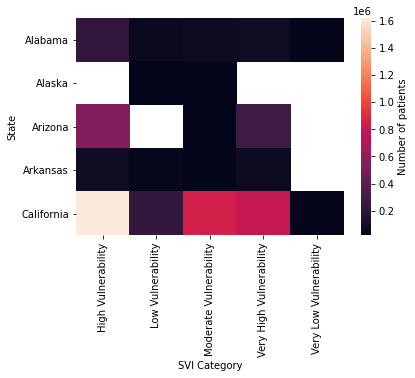

In [49]:
sns.heatmap(heatmap_data.head(num_states), xticklabels=svi_categories, cbar_kws={'label': 'Number of patients'})
plt.xlabel('SVI Category')
plt.show()

## Regressions for sex, age and ethnic group 